In [2]:
import pandas as pd
import matplotlib.pylab as plt
% matplotlib inline
import numpy as np
import seaborn as sns


In [3]:
df = pd.read_csv("EMS_Incident_Dispatch_Data.csv",usecols=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,18,19,20,22])

//anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [271]:
df.ix[1]

CAD_INCIDENT_ID                                130010002
INCIDENT_DATETIME                 01/01/2013 12:00:19 AM
INITIAL_CALL_TYPE                                   CARD
INITIAL_SEVERITY_LEVEL_CODE                            3
FINAL_CALL_TYPE                                     CARD
FINAL_SEVERITY_LEVEL_CODE                              3
FIRST_ASSIGNMENT_DATETIME         01/01/2013 12:01:18 AM
VALID_DISPATCH_RSPNS_TIME_INDC                         Y
DISPATCH_RESPONSE_SECONDS_QY                          59
FIRST_ACTIVATION_DATETIME         01/01/2013 12:02:08 AM
FIRST_ON_SCENE_DATETIME           01/01/2013 12:14:30 AM
VALID_INCIDENT_RSPNS_TIME_INDC                         Y
INCIDENT_RESPONSE_SECONDS_QY                         851
INCIDENT_TRAVEL_TM_SECONDS_QY                        792
FIRST_TO_HOSP_DATETIME                               NaN
FIRST_HOSP_ARRIVAL_DATETIME                          NaN
INCIDENT_CLOSE_DATETIME           01/01/2013 12:55:34 AM
INCIDENT_DISPOSITION_CODE      

In [152]:
len(df)
df.columns

Index([u'CAD_INCIDENT_ID', u'INCIDENT_DATETIME', u'INITIAL_CALL_TYPE',
       u'INITIAL_SEVERITY_LEVEL_CODE', u'FINAL_CALL_TYPE',
       u'FINAL_SEVERITY_LEVEL_CODE', u'FIRST_ASSIGNMENT_DATETIME',
       u'VALID_DISPATCH_RSPNS_TIME_INDC', u'DISPATCH_RESPONSE_SECONDS_QY',
       u'FIRST_ACTIVATION_DATETIME', u'FIRST_ON_SCENE_DATETIME',
       u'VALID_INCIDENT_RSPNS_TIME_INDC', u'INCIDENT_RESPONSE_SECONDS_QY',
       u'INCIDENT_TRAVEL_TM_SECONDS_QY', u'FIRST_TO_HOSP_DATETIME',
       u'FIRST_HOSP_ARRIVAL_DATETIME', u'INCIDENT_CLOSE_DATETIME',
       u'INCIDENT_DISPOSITION_CODE', u'BOROUGH', u'ATOM', u'ZIPCODE'],
      dtype='object')

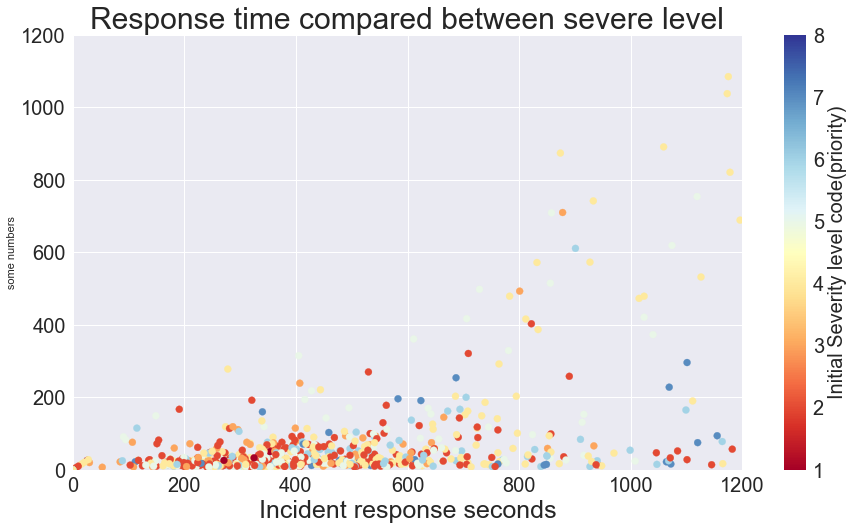

In [180]:
# response time explore,for first 1000 records
plt.figure(figsize= (15,8))
x = df.ix[0:1000,"INCIDENT_RESPONSE_SECONDS_QY"]
y = df.ix[0:1000,"DISPATCH_RESPONSE_SECONDS_QY"]
severe = df.ix[0:1000,'INITIAL_SEVERITY_LEVEL_CODE']
scat= plt.scatter(x,y, c=severe ,cmap = 'RdYlBu',label = severe)


plt.xlim(0,1200)
plt.ylim(0,1200)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Response time compared between severe level',fontsize = 30)
plt.xlabel('Incident response seconds',fontsize =25)
plt.ylabel('some numbers')
#plt.xlabel()Incident response seconds-- time between call and first-on-scene (s)')


bounds = np.linspace(1,9,9)
cb = plt.colorbar(scat, spacing='proportional',ticks=bounds)
cb.ax.tick_params(labelsize=20)
cb.set_label('Initial Severity level code(priority)',fontsize = 20)

In [58]:
df_type = {}
for i in range(1,10):
    df_type[i] = df[df['INITIAL_SEVERITY_LEVEL_CODE']==i]   

In [154]:
# mistaken type counts
len(df[df['INITIAL_CALL_TYPE'] != df['FINAL_CALL_TYPE']])

313547

In [153]:
# mistaken level counts
len(df[df['INITIAL_SEVERITY_LEVEL_CODE'] != df['FINAL_SEVERITY_LEVEL_CODE']])

300255

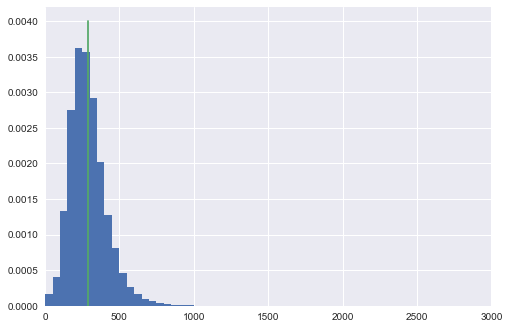

In [266]:
# histogram of the 1 st priority level waiting time from call to the ambulance on scene
a = df_type[1]["INCIDENT_RESPONSE_SECONDS_QY"].dropna()
plt.hist(a,bins=100,normed=1)
plt.xlim(0,3000)
plt.plot([a.mean(),a.mean()],[0,0.004])

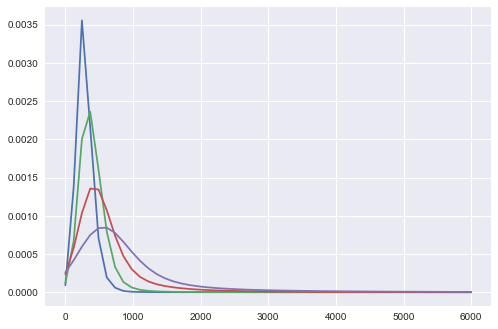

In [166]:
for i in range(1,9,2):
    data = df_type[i]["INCIDENT_RESPONSE_SECONDS_QY"].dropna()
    density = gaussian_kde(data)
    xs = np.linspace(0,6000)
    density.covariance_factor = lambda : .25
    density._compute_covariance()
    plt.plot(xs,density(xs))

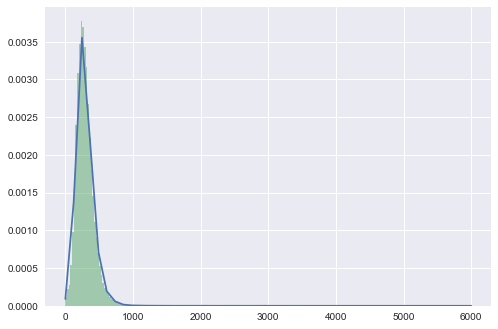

In [160]:
# fit a gaussion pdf to 1st priority level histogram
from scipy.stats import gaussian_kde
data = a
density = gaussian_kde(data)
xs = np.linspace(0,6000)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs))
plt.hist(df_type[1]["INCIDENT_RESPONSE_SECONDS_QY"].dropna(),  bins =200, normed =1,alpha = 0.5,label = 'priority1')

plt.show()

In [110]:
len(df[df['INITIAL_SEVERITY_LEVEL_CODE'] < df['FINAL_SEVERITY_LEVEL_CODE']])

27329

In [155]:
len(under_estimate)

272926

In [157]:
wrong_estimate = df[df['INITIAL_SEVERITY_LEVEL_CODE'] != df['FINAL_SEVERITY_LEVEL_CODE']]

In [158]:
wrong_estimate.to_csv('wrong_estimate.csv')

In [112]:
under_estimate = df[df['INITIAL_SEVERITY_LEVEL_CODE'] > df['FINAL_SEVERITY_LEVEL_CODE']]

In [116]:
under_estimate[under_estimate['INITIAL_CALL_TYPE'] == 'SICK']['FINAL_CALL_TYPE'].value_counts()

CARD      17402
ALTMEN     8644
DIFFBR     7304
UNC        5063
ABDPN      4331
INJURY     3505
RESPIR     3231
DRUG       2858
INBLED     1497
STATEP     1378
CVAC       1298
SICK       1182
ARREST     1071
SEIZR      1035
CVA         967
SICPED      866
UNKNOW      795
ASTHMB      789
INJMAJ      592
ANAPH       441
MEDRXN      364
OBMAJ       256
INHALE      211
OBLAB       196
MVAINJ      187
GYNHEM      173
OBCOMP      150
HEAT        149
CHOKE       104
INJALS       98
          ...  
ABDPFC       11
JUMPDN       10
PEDFC        10
EDP          10
MCI80P        9
DIFFFC        9
MCI43P        8
HYPTN         7
AMPMIN        6
SICKFT        6
MCI59P        5
ELECT         4
DROWN         3
SICKRF        3
SICKFC        3
PEDRF         3
ALTMFC        2
CHILDA        2
INBLFC        1
BURNMI        1
MCI23P        1
MCI29P        1
INJMIN        1
RAPE          1
MCI42P        1
DIFFRF        1
MCI21P        1
OTHER         1
CARDFC        1
UNCFC         1
Name: FINAL_CALL_TYPE, d

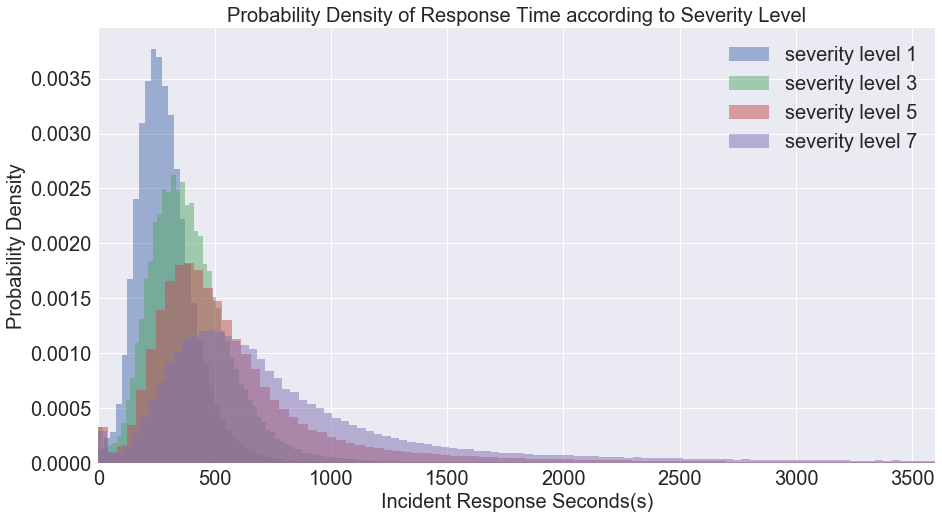

In [475]:
plt.figure(figsize=(15,8))
plt.xlim(0,3600)

plt.hist(df_type[1]["INCIDENT_RESPONSE_SECONDS_QY"].dropna(),  bins =200, normed =1,alpha = 0.5,label = 'severity level 1')
plt.hist(df_type[3]["INCIDENT_RESPONSE_SECONDS_QY"].dropna(),  bins =400, normed =1,alpha = 0.5,label = 'severity level 3')
plt.hist(df_type[5]["INCIDENT_RESPONSE_SECONDS_QY"].dropna(),  bins =600, normed =1,alpha = 0.5,label = 'severity level 5')
plt.hist(df_type[7]["INCIDENT_RESPONSE_SECONDS_QY"].dropna(),  bins =800, normed =1,alpha = 0.5,label = 'severity level 7')
plt.legend(fontsize = 20)

plt.xlabel('Incident Response Seconds(s)',fontsize= 20)
plt.ylabel('Probability Density',fontsize =20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('Probability Density of Response Time according to Severity Level',fontsize =20)

#### Caption: Response time has strong correlation with priority level, the higher the level is(priority 1), the shorter the time will be.

In [55]:
df['INITIAL_CALL_TYPE'].value_counts()[:20]

SICK      804005
INJURY    694438
DIFFBR    432380
EDP       373283
DRUG      303068
UNC       274363
UNKNOW    239681
ABDPN     225506
CARD      180120
MVAINJ    152336
RESPIR     89740
OTHER      82725
PEDSTR     82277
STATEP     80479
ASTHMB     77119
INJMAJ     73212
ALTMEN     72492
ARREST     61369
SEIZR      56255
INBLED     40831
Name: INITIAL_CALL_TYPE, dtype: int64

In [14]:
df.columns

Index([u'CAD_INCIDENT_ID', u'INCIDENT_DATETIME', u'INITIAL_CALL_TYPE',
       u'INITIAL_SEVERITY_LEVEL_CODE', u'FINAL_CALL_TYPE',
       u'FINAL_SEVERITY_LEVEL_CODE', u'FIRST_ASSIGNMENT_DATETIME',
       u'VALID_DISPATCH_RSPNS_TIME_INDC', u'DISPATCH_RESPONSE_SECONDS_QY',
       u'FIRST_ACTIVATION_DATETIME', u'FIRST_ON_SCENE_DATETIME',
       u'VALID_INCIDENT_RSPNS_TIME_INDC', u'INCIDENT_RESPONSE_SECONDS_QY',
       u'INCIDENT_TRAVEL_TM_SECONDS_QY', u'FIRST_TO_HOSP_DATETIME',
       u'FIRST_HOSP_ARRIVAL_DATETIME', u'INCIDENT_CLOSE_DATETIME',
       u'INCIDENT_DISPOSITION_CODE', u'BOROUGH', u'ATOM', u'ZIPCODE'],
      dtype='object')

In [21]:
df.ix[0,'DISPATCH_RESPONSE_SECONDS_QY']  #101
df.ix[0,"INCIDENT_RESPONSE_SECONDS_QY"]  #797
df.ix[0,'INCIDENT_TRAVEL_TM_SECONDS_QY'] #696

696.0

In [17]:
df.INITIAL_SEVERITY_LEVEL_CODE.value_counts()

2    969618
5    949936
4    909171
6    880011
3    585351
7    448187
1     69239
8     15946
9        55
Name: INITIAL_SEVERITY_LEVEL_CODE, dtype: int64

In [183]:
level_diff = df[df['INITIAL_SEVERITY_LEVEL_CODE'] != df['FINAL_SEVERITY_LEVEL_CODE']]
level_same = df[df['INITIAL_SEVERITY_LEVEL_CODE'] == df['FINAL_SEVERITY_LEVEL_CODE']]

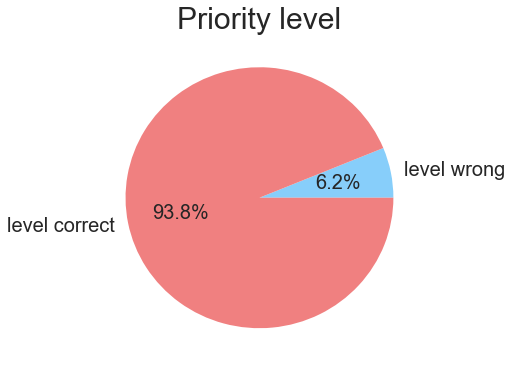

In [216]:

plt.figure(figsize= (6,6))
sizes =( len(level_diff),len(level_same))
colors = ['lightskyblue', 'lightcoral']
labels =['level wrong',
        'level correct']

patches, texts, autotexts = plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%', shadow=False)
texts[0].set_fontsize(20)
texts[1].set_fontsize(20)
autotexts[0].set_fontsize(20)
autotexts[1].set_fontsize(20)
plt.title("Priority level",fontsize= 30)

#### Caption: As Priority level has strong correlation with rescue time, it turns out 6.2% of 911 call got wrong priority level.

In [219]:
under_estimate = level_diff[level_diff['INITIAL_SEVERITY_LEVEL_CODE'] > level_diff['FINAL_SEVERITY_LEVEL_CODE']]

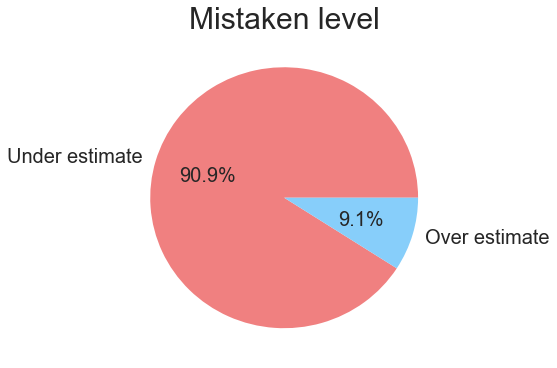

In [222]:
plt.figure(figsize= (6,6))
sizes =( len(under_estimate),len(level_diff)-len(under_estimate))
colors = [ 'lightcoral','lightskyblue']
labels =['Under estimate',
        'Over estimate']

patches, texts, autotexts = plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%', shadow=False)
texts[0].set_fontsize(20)
texts[1].set_fontsize(20)
autotexts[0].set_fontsize(20)
autotexts[1].set_fontsize(20)
plt.title("Mistaken level",fontsize= 30)

#### Caption: Among mistaken level cases , 90.9% were under_estimated, which are more than 270,000 in the records. By mistaken level, especially because of under-estimation, a lot of people probably lost the best chance to be rescued.

In [305]:
pair = pd.DataFrame(under_estimate['INITIAL_SEVERITY_LEVEL_CODE'])

In [306]:
pair['final'] = under_estimate['FINAL_SEVERITY_LEVEL_CODE']

In [307]:
pair = pair.rename(columns={"INITIAL_SEVERITY_LEVEL_CODE":"initial"}).reset_index(drop= True)

In [308]:
mean_time = {}
median_time ={}
for i in range(1,10):
    a = df_type[i]["INCIDENT_RESPONSE_SECONDS_QY"].dropna()
    mean_time[i]= a.mean()
    median_time[i] = np.median(a)

In [309]:
median_time

{1: 273.0,
 2: 376.0,
 3: 369.0,
 4: 455.0,
 5: 480.0,
 6: 493.0,
 7: 652.0,
 8: 470.0,
 9: 13.5}

In [310]:
mean_time

{1: 290.8606760941974,
 2: 404.5175012246001,
 3: 399.5307237459972,
 4: 550.3591582044819,
 5: 620.3316804873187,
 6: 673.1149483090547,
 7: 939.5826095733381,
 8: 2744.5916595612744,
 9: 212.0}

In [313]:
pair = pair[pair.initial != 9].reset_index(drop = True)

In [300]:
def exected_d_time(initial, final):
    return mean_time[initial] - mean_time[final]

In [315]:
pair['time_wasted'] = map(exected_d_time, pair.initial, pair.final)

In [322]:
def get_pair(initial,final):
    return str(initial)+','+ str(final)

In [323]:
pair['pair'] = map(get_pair,pair.initial, pair.final)

In [336]:
pair_counts = pair['pair'].value_counts(ascending = False)

In [342]:
pair_counts.index

Index([u'4,2', u'6,3', u'5,3', u'4,3', u'2,1', u'3,2', u'6,2', u'7,4', u'6,4',
       u'5,2', u'6,5', u'5,4', u'7,5', u'7,3', u'7,6', u'7,2', u'4,1', u'3,1',
       u'6,1', u'8,2', u'5,1', u'7,1', u'8,5', u'8,4', u'8,3', u'8,7', u'8,6',
       u'8,1'],
      dtype='object')

In [346]:
def expect_time_all():
    a = 0
    for i in pair_counts.index:
        a += exected_d_time(int(i[0]), int(i[2])) * pair_counts[i]/len(pair)
    return a

In [347]:
expect_time_all()

210.5859452343911

In [350]:
dead = df[df.INCIDENT_DISPOSITION_CODE == 83]

In [356]:
wrong_to_dead = dead[dead['INITIAL_SEVERITY_LEVEL_CODE'] > dead['FINAL_SEVERITY_LEVEL_CODE']]

In [358]:
len(dead),len(wrong_to_dead)

(32999, 5608)

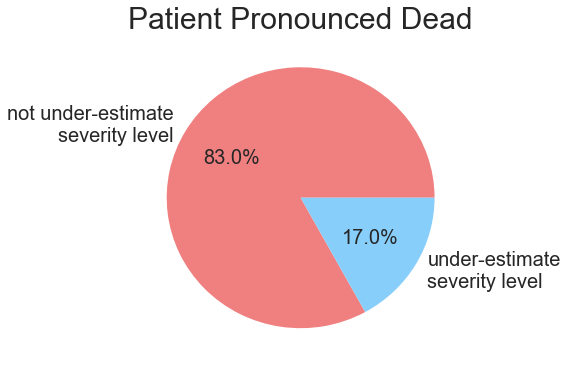

In [367]:
plt.figure(figsize= (6,6))
sizes =( len(dead)- len(wrong_to_dead),len(wrong_to_dead))
colors = [ 'lightcoral','lightskyblue']
labels =['not under-estimate\nseverity level',
        'under-estimate\nseverity level']

patches, texts, autotexts = plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%', shadow=False)
texts[0].set_fontsize(20)
texts[1].set_fontsize(20)
autotexts[0].set_fontsize(20)
autotexts[1].set_fontsize(20)
plt.title("Patient Pronounced Dead",fontsize= 30)

In [373]:
import datetime as datetime

In [444]:
df['datetime']  = map(lambda x: datetime.datetime.strptime(x, "%m/%d/%Y %I:%M:%S %p"), df.INCIDENT_DATETIME)

In [396]:
# people who died, because of arrest
sum(df[df.INCIDENT_DISPOSITION_CODE ==83]['FINAL_CALL_TYPE'] == 'ARREST')

29074

In [397]:
# patients had arrest
sum(df['FINAL_CALL_TYPE'] == 'ARREST')

90884

In [445]:
arrest = df[df.FINAL_CALL_TYPE == 'ARREST'].reset_index(drop = True)

In [446]:
arrest.head()

,CAD_INCIDENT_ID,INCIDENT_DATETIME,INITIAL_CALL_TYPE,INITIAL_SEVERITY_LEVEL_CODE,FINAL_CALL_TYPE,FINAL_SEVERITY_LEVEL_CODE,FIRST_ASSIGNMENT_DATETIME,VALID_DISPATCH_RSPNS_TIME_INDC,DISPATCH_RESPONSE_SECONDS_QY,FIRST_ACTIVATION_DATETIME,...,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,FIRST_TO_HOSP_DATETIME,FIRST_HOSP_ARRIVAL_DATETIME,INCIDENT_CLOSE_DATETIME,INCIDENT_DISPOSITION_CODE,BOROUGH,ATOM,ZIPCODE,datetime
0,130010004,01/01/2013 12:01:04 AM,ARREST,1,ARREST,1,01/01/2013 12:01:33 AM,Y,29,01/01/2013 12:01:58 AM,...,429.0,400.0,NaN,NaN,01/01/2013 12:38:05 AM,83.0,QUEENS,NaN,11418.0,2013-01-01 00:01:04
1,130010028,01/01/2013 12:07:31 AM,ARREST,1,ARREST,1,01/01/2013 12:07:57 AM,Y,26,01/01/2013 12:07:57 AM,...,26.0,0.0,01/01/2013 12:08:09 AM,01/01/2013 12:17:43 AM,01/01/2013 12:38:34 AM,82.0,BROOKLYN,NaN,11211.0,2013-01-01 00:07:31
2,130010080,01/01/2013 12:20:10 AM,ARREST,1,ARREST,1,01/01/2013 12:20:27 AM,Y,17,01/01/2013 12:20:35 AM,...,308.0,291.0,01/01/2013 01:01:54 AM,01/01/2013 01:08:32 AM,01/01/2013 01:59:47 AM,82.0,RICHMOND / STATEN ISLAND,NaN,10304.0,2013-01-01 00:20:10
3,130010223,01/01/2013 12:42:00 AM,CVA,4,ARREST,1,01/01/2013 12:43:59 AM,Y,119,01/01/2013 12:44:16 AM,...,274.0,155.0,01/01/2013 01:02:03 AM,01/01/2013 01:03:26 AM,01/01/2013 01:37:38 AM,82.0,MANHATTAN,NaN,10027.0,2013-01-01 00:42:00
4,130010246,01/01/2013 12:46:52 AM,ARREST,1,ARREST,1,01/01/2013 12:47:11 AM,Y,19,01/01/2013 12:47:16 AM,...,219.0,200.0,01/01/2013 01:05:57 AM,01/01/2013 01:21:42 AM,01/01/2013 02:13:35 AM,82.0,RICHMOND / STATEN ISLAND,NaN,10308.0,2013-01-01 00:46:52


In [450]:
df['hour'] = map(lambda x : x.hour , df.datetime )

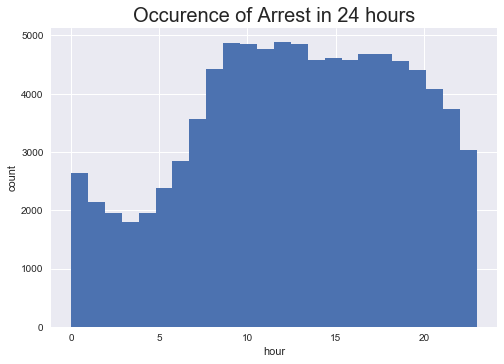

In [464]:
plt.hist(arrest.hour,bins=24)
plt.xlabel('hour')
plt.ylabel('count')
plt.title('Occurence of Arrest in 24 hours',fontsize = 20)

(array([ 23755.,  20848.,  18764.,  17035.,  16707.,  13567.,  13665.,
         17544.,  26151.,  30711.,  31904.,  33913.,  35152.,  36114.,
         36994.,  36871.,  36161.,  36501.,  35807.,  34933.,  33509.,
         31646.,  28998.,  26121.]),
 array([  0.        ,   0.95833333,   1.91666667,   2.875     ,
          3.83333333,   4.79166667,   5.75      ,   6.70833333,
          7.66666667,   8.625     ,   9.58333333,  10.54166667,
         11.5       ,  12.45833333,  13.41666667,  14.375     ,
         15.33333333,  16.29166667,  17.25      ,  18.20833333,
         19.16666667,  20.125     ,  21.08333333,  22.04166667,  23.        ]),
 <a list of 24 Patch objects>)

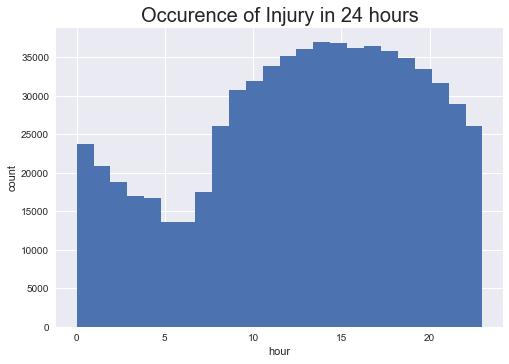

In [465]:
sym = df[df["FINAL_CALL_TYPE"] == 'INJURY']
plt.xlabel('hour')
plt.ylabel('count')
plt.title('Occurence of Injury in 24 hours',fontsize = 20)

plt.hist(sym.hour,bins=24)


(array([  7122.,   6461.,   5505.,   5044.,   4457.,   4297.,   4646.,
          5876.,   8032.,  10680.,  12190.,  12734.,  12676.,  12373.,
         12058.,  11250.,  10474.,   9953.,   9534.,   9576.,   9747.,
          9287.,   8809.,   8190.]),
 array([  0.        ,   0.95833333,   1.91666667,   2.875     ,
          3.83333333,   4.79166667,   5.75      ,   6.70833333,
          7.66666667,   8.625     ,   9.58333333,  10.54166667,
         11.5       ,  12.45833333,  13.41666667,  14.375     ,
         15.33333333,  16.29166667,  17.25      ,  18.20833333,
         19.16666667,  20.125     ,  21.08333333,  22.04166667,  23.        ]),
 <a list of 24 Patch objects>)

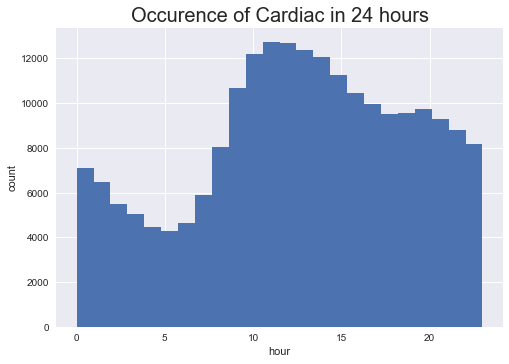

In [466]:
sym = df[df["FINAL_CALL_TYPE"] == 'CARD']
plt.xlabel('hour')
plt.ylabel('count')
plt.title('Occurence of Cardiac in 24 hours',fontsize = 20)
plt.hist(sym.hour,bins=24)

In [467]:
df['month'] = map(lambda x : x.month , df.datetime )